In [101]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings("ignore")

In [102]:
df = pd.read_csv('D2.csv')
print(df.info())
# print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789 entries, 0 to 5788
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5789 non-null   object 
 1   age               5789 non-null   object 
 2   height            5789 non-null   int64  
 3   weight            5789 non-null   int64  
 4   blood_type        5789 non-null   object 
 5   insurance         5789 non-null   object 
 6   income            5789 non-null   object 
 7   smoking           5789 non-null   object 
 8   alcohol           5789 non-null   float64
 9   contacts_count    5789 non-null   float64
 10  working           5789 non-null   object 
 11  worried           5789 non-null   float64
 12  covid19_positive  5789 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 588.1+ KB
None


# Neural Networks 🧠

## Task 1. 
What pre-processing was required on the dataset before neural network modelling? What distribution split between training and test datasets was used?

-> Same as regression

## Task 2 
Build a Neural Network model using the default setting. Answer the following:

In [103]:
# Data preparation 🫃🏿

# setting random state
rs = 30678

from sklearn.model_selection import train_test_split
def data_prep(df):
    df = pd.get_dummies(df) # one 🥵 
    
    y = df['covid19_positive']
    
    X = df.drop(['covid19_positive'], axis=1)    
    
    X_mat = X.to_numpy()

    X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)
    return df,X,y,X_train, X_test, y_train, y_test

df,X,y,X_train, X_test, y_train, y_test = data_prep(df)



In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

print("Before scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

X_train = scaler.fit_transform(X_train, y_train)

print("After scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

X_test = scaler.transform(X_test)

Before scaling
-------------
Variable #0: min 110, max 228, mean 171.90 and std dev 10.93
Variable #1: min 44, max 180, mean 84.70 and std dev 23.34
Variable #2: min 0.0, max 14.0, mean 2.68 and std dev 3.13
Variable #3: min 0.0, max 21.0, mean 7.87 and std dev 6.70
Variable #4: min 1.0, max 5.0, mean 3.64 and std dev 0.72
After scaling
-------------
Variable #0: min -5.66385424611233, max 5.133102192047165, mean -0.00 and std dev 1.00
Variable #1: min -1.7438704260112774, max 4.083751483723398, mean 0.00 and std dev 1.00
Variable #2: min -0.8575106988353736, max 3.619697485567119, mean 0.00 and std dev 1.00
Variable #3: min -1.173975606905906, max 1.9592280546954912, mean -0.00 and std dev 1.00
Variable #4: min -3.676761824558861, max 1.8890321095449987, mean 0.00 and std dev 1.00


In [132]:
# train the default model

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

model_default = MLPClassifier(random_state=rs)
model_default.fit(X_train, y_train)
print("Train accuracy:", model_default.score(X_train, y_train))
print("Test accuracy:", model_default.score(X_test, y_test))
y_pred = model_default.predict(X_test)
print(classification_report(y_test, y_pred))
print(model_default)

Train accuracy: 0.903751233958539
Test accuracy: 0.6781807714450202
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1036
           1       0.61      0.58      0.59       701

    accuracy                           0.68      1737
   macro avg       0.66      0.66      0.66      1737
weighted avg       0.68      0.68      0.68      1737

MLPClassifier(random_state=30678)


In [133]:
# Determine the layer sizes
coefs = model_default.coefs_
input_layer_size = coefs[0].shape[0]
hidden_layer_sizes = model_default.hidden_layer_sizes[0]
output_layer_size = coefs[-1].shape[1]
# Print the layer sizes
print(f"Input Layer Size: {input_layer_size}")
print(f"Hidden Layer Sizes: {hidden_layer_sizes}")
print(f"Output Layer Size: {output_layer_size}")

Input Layer Size: 45
Hidden Layer Sizes: 100
Output Layer Size: 1


In [134]:
print("Which activation funciton is used?", model_default.activation)
print("What is the algorithm for finding the optimal weight set?", model_default.solver)
print("Number of iterations run:", model_default.n_iter_)
print("Did the training converge?", model_default.n_iter_ < model_default.max_iter)

Which activation funciton is used? relu
What is the algorithm for finding the optimal weight set? adam
Number of iterations run: 200
Did the training converge? False


### Task 2-a. 
Explain the parameters used in building this model, e.g., network architecture, iterations, activation function, etc.

-> network architect: 1 input layer (size: 45), 1 hidden layer(100), 1 output layer(1) </br>
... *(refer to the code above)*

### Task 2-b.
What is the classification accuracy on training and test datasets?

-> *see the code above*

### Task 2-c.
Did the training process converge and result in the best model?

-> yes *(refer to the code above)*

## Task 3
Refine this network by fine-tuning it with GridSearchCV. Report the trained model.

In [117]:
# Train/build the model (cv_model) using GridSearchCV

from sklearn.model_selection import GridSearchCV

print("Shape:", X_train.shape)

Shape: (4052, 45)


In [149]:
params = {'hidden_layer_sizes': [(x,) for x in range(5, 46, 5)],  'alpha': [0.01,0.001, 0.0001, 0.00001]}

model_cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs, max_iter=2000),return_train_score=True, cv=10, n_jobs=-1)
model_cv.fit(X_train, y_train)
result_set = model_cv.cv_results_
# print(result_set)

In [150]:
print("Train accuracy:", model_cv.score(X_train, y_train))
print("Test accuracy:", model_cv.score(X_test, y_test))
y_pred = model_cv.predict(X_test)
print(classification_report(y_test, y_pred))
print(model_cv.best_params_)

Train accuracy: 0.7393879565646594
Test accuracy: 0.6845135290731146
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      1036
           1       0.63      0.53      0.58       701

    accuracy                           0.68      1737
   macro avg       0.67      0.66      0.66      1737
weighted avg       0.68      0.68      0.68      1737

{'alpha': 0.01, 'hidden_layer_sizes': (5,)}


In [122]:
# Determine the layer sizes
model_cv_best = model_cv.best_estimator_
coefs = model_cv_best.coefs_
input_layer_size = coefs[0].shape[0]
hidden_layer_sizes = [coef.shape[1] for coef in coefs[:-1]]
output_layer_size = coefs[-1].shape[1]
# Print the layer sizes
print(f"Input Layer Size: {input_layer_size}")
print(f"Hidden Layer Sizes: {hidden_layer_sizes}")
print(f"Output Layer Size: {output_layer_size}")

Input Layer Size: 45
Hidden Layer Sizes: [5]
Output Layer Size: 1


In [123]:
print("Which activation funciton is used?", model_cv_best.activation)
print("What is the algorithm for finding the optimal weight set?", model_cv_best.solver)
print("Number of iterations run:", model_cv_best.n_iter_)
print("Did the training converge?", model_cv_best.n_iter_ < model_cv_best.max_iter)

Which activation funciton is used? relu
What is the algorithm for finding the optimal weight set? adam
Number of iterations run: 344
Did the training converge? True


## Task 3-a ~ c

*(the questions are same as task2, and they all can be found in the code above)*

## Task 3-d Do you see any sign of over-fitting?

-> slightly, but I think it's not critical and acceptable since the numbers are close.

## Task 4
Let us see if feature selection helps in improving the model. Build another neural network model with a reduced feature set. Perform dimensionality reduction by selecting variables with a decision tree (use the best decision tree model that you have built in the previous modelling task). Fine-tune the model with GridSearchCV to find the best parameter setting. Answer the followings:

In [125]:
import pickle
with open('DT.pickle', 'rb') as f:
    dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv = pickle.load(f)
#dt_best.fit(X_train, y_train)

print(dt_best.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 20}


In [126]:
import numpy as np
def analyse_feature_importance(dm_model, feature_names, n_to_display=20):
    # grab feature importances from the model
    importances = dm_model.feature_importances_
    
    # sort them out in descending order
    indices = np.argsort(importances)
    indices = np.flip(indices, axis=0)

    # limit to 20 features, you can leave this out to print out everything
    indices = indices[:n_to_display]

    for i in indices:
        print(feature_names[i], ':', importances[i])

In [128]:
analyse_feature_importance(dt_best.best_estimator_, X.columns)

income_high : 0.3555254289764614
worried : 0.17058832010549724
contacts_count : 0.11639389957741678
weight : 0.069075079563171
insurance_no : 0.03432621115864898
height : 0.031952463001873314
working_travel non critical : 0.027644220263843305
income_low : 0.02446245411826565
age_60_70 : 0.02274065858456186
working_stopped : 0.021760977159120738
blood_type_unknown : 0.016664776667126985
alcohol : 0.015996961825192328
working_travel critical : 0.012601947350266065
age_20_30 : 0.01195089768490279
age_70_80 : 0.010662567322991503
working_home : 0.010129953423299198
gender_male : 0.009601082065985962
gender_female : 0.007258564868465442
income_med : 0.00671761097320458
working_never : 0.0065048875357108195


In [135]:
from sklearn.feature_selection import SelectFromModel

# use the trained best decision tree from GridSearchCV to select features
# supply the prefit=True parameter to stop SelectFromModel to re-train the model
selectmodel = SelectFromModel(dt_best.best_estimator_, prefit=True)
X_train_sel_model = selectmodel.transform(X_train)
X_test_sel_model = selectmodel.transform(X_test)

print(X_train_sel_model.shape)

(4052, 9)


In [131]:
params = {'hidden_layer_sizes': [(x,) for x in range(5, 46, 5)],  'alpha': [0.01,0.001, 0.0001, 0.00001]}

model_pickle = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs, max_iter=1000),return_train_score=True, cv=10, n_jobs=-1)
model_pickle.fit(X_train_sel_model, y_train)
result_set = model_pickle.cv_results_
print("Train accuracy:", model_pickle.score(X_train_sel_model, y_train))
print("Test accuracy:", model_pickle.score(X_test_sel_model, y_test))
y_pred = model_pickle.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))
print(model_pickle.best_params_)

Train accuracy: 0.7376604146100691
Test accuracy: 0.7052389176741508
              precision    recall  f1-score   support

           0       0.73      0.80      0.76      1036
           1       0.66      0.57      0.61       701

    accuracy                           0.71      1737
   macro avg       0.69      0.68      0.69      1737
weighted avg       0.70      0.71      0.70      1737

{'alpha': 0.001, 'hidden_layer_sizes': (40,)}


In [136]:
# Determine the layer sizes
model_pickle_best = model_pickle.best_estimator_
coefs = model_pickle_best.coefs_
input_layer_size = coefs[0].shape[0]
hidden_layer_sizes = [coef.shape[1] for coef in coefs[:-1]]
output_layer_size = coefs[-1].shape[1]
# Print the layer sizes
print(f"Input Layer Size: {input_layer_size}")
print(f"Hidden Layer Sizes: {hidden_layer_sizes}")
print(f"Output Layer Size: {output_layer_size}")

Input Layer Size: 9
Hidden Layer Sizes: [40]
Output Layer Size: 1


In [137]:
print("Which activation funciton is used?", model_pickle_best.activation)
print("What is the algorithm for finding the optimal weight set?", model_pickle_best.solver)
print("Number of iterations run:", model_pickle_best.n_iter_)
print("Did the training converge?", model_pickle_best.n_iter_ < model_pickle_best.max_iter)

Which activation funciton is used? relu
What is the algorithm for finding the optimal weight set? adam
Number of iterations run: 292
Did the training converge? True


### Task 4-a
Did feature selection favour the outcome? Any change in network architecture? What inputs are being used as the network input?

-> it doesnt seem that the outcome is better after feature selection, however, given the fact it only use 9 features and the result is pretty close to the models which use 45, it is actually not bad. </br>
-> change in arch? *(chekc the code above)* </br>
-> check the code above where I print the feature importances, and the first 9 ones are the anwsers.

### Task 4-b. 
What is the classification accuracy of training and test datasets?

-> *(answer is in the code above)*

### Task 4-c. 
How many iterations are now needed to train this network?

-> *(answer is in the code above)*

### Task 4-d. 
Do you see any sign of over-fitting? Did the training process converge and result in the best model?

-> slightly, but I think it's not critical and acceptable since the numbers are close.</br>
-> yup, it converges and find the best result at the 63th iteration.


## Task 5
Produce the ROC curve for all different neural networks. 

There are 3 models created:
1. **model_default**: the model using the default setting with all inputs
1. **model_cv**: the model fine-tuned with GridSearchCV.
1. **model_pickle**: the model with less input variables (reduced by decision tree selection) and is fine-tuned with GridSearchCV.

In [138]:
from sklearn.metrics import roc_auc_score

y_default_proba = model_default.predict_proba(X_test)
y_cv_proba = model_cv.predict_proba(X_test)
y_pickle_proba = model_pickle.predict_proba(X_test_sel_model)
roc_index_default = roc_auc_score(y_test, y_default_proba[:, 1])
roc_index_cv = roc_auc_score(y_test, y_cv_proba[:, 1])
roc_index_pickle = roc_auc_score(y_test, y_pickle_proba[:, 1])

print("ROC index on test for model_default:", roc_index_default)
print("ROC index on test for model_cv:", roc_index_cv)
print("ROC index on test for model_pickle:", roc_index_pickle)

ROC index on test for model_default: 0.7286267824784229
ROC index on test for model_cv: 0.732182100584383
ROC index on test for model_pickle: 0.7525714781420916


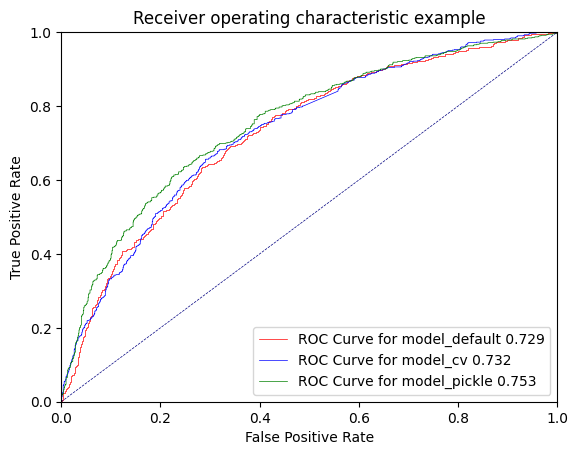

In [139]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr_default, tpr_default, thresholds_default = roc_curve(y_test, y_default_proba[:,1])
fpr_cv, tpr_cv, thresholds_cv = roc_curve(y_test, y_cv_proba[:,1])
fpr_pickle_cv, tpr_pickle_cv, thresholds_pickle_cv = roc_curve(y_test, y_pickle_proba[:,1])

plt.plot(fpr_default, tpr_default, label='ROC Curve for model_default {:.3f}'.format(roc_index_default), color='red', lw=0.5)
plt.plot(fpr_cv, tpr_cv, label='ROC Curve for model_cv {:.3f}'.format(roc_index_cv), color='blue', lw=0.5)
plt.plot(fpr_pickle_cv, tpr_pickle_cv, label='ROC Curve for model_pickle {:.3f}'.format(roc_index_pickle), color='green', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [146]:

best_model = model_pickle.best_estimator_
weights = best_model.coefs_[0]

feature_names = X.columns

# Flatten the weights and combine with feature names
weight_feature_pairs = [(feature_names[i], weights[i][j]) for i in range(weights.shape[0]) for j in range(weights.shape[1])]

# Create a DataFrame for easy handling
df_weights = pd.DataFrame(weight_feature_pairs, columns=['Feature', 'Weight'])

# Filter for positive weights only
df_positive_weights = df_weights[df_weights['Weight'] > 0]

# Sort by weight in descending order and get the top 10
top_50_weights = df_positive_weights.sort_values(by='Weight', ascending=False).head(50)

# Display the top 10 weights with feature names
print(top_50_weights)



            Feature    Weight
137  contacts_count  0.698517
219   gender_female  0.578751
113         alcohol  0.575051
157  contacts_count  0.572102
143  contacts_count  0.566457
99          alcohol  0.554170
263     gender_male  0.553596
130  contacts_count  0.552835
220   gender_female  0.550079
237   gender_female  0.529608
198         worried  0.521408
139  contacts_count  0.521105
149  contacts_count  0.518594
185         worried  0.517715
163         worried  0.505010
52           weight  0.504108
158  contacts_count  0.498406
167         worried  0.498300
326        age_0_10  0.497301
11           height  0.481249
111         alcohol  0.475822
181         worried  0.471449
275     gender_male  0.469295
218   gender_female  0.467690
281    gender_other  0.462799
25           height  0.462154
333        age_0_10  0.459626
61           weight  0.458712
36           height  0.453344
215   gender_female  0.439045
242     gender_male  0.431000
279     gender_male  0.424513
316    gen

### Task 5. 

Now, using the best neural network model, provide characteristics of the individuals identified as COVID positive by the model? 

-> *(answer is in the code)*

If it is difficult (or even infeasible) to comprehend, discuss why.

-> It is not comprehensible and difficult to intepret what variables are important to the generated result if we look at the weights of the model. The reason is the neural network is like a black box where each input is connecting to each neuron in the hidden layer. Hence, from the result we can see there are multiple number of associated weights. 